<a href="https://colab.research.google.com/github/Adwait-Naravane/Projects--comp-phy-/blob/pendulums/2_Pend_drag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math
import matplotlib.animation as animation


In [ ]:
l1 = 1
l2 = 1
m1 = 1
m2 = 1
b = 0.0
g = 9.8
def model(y, t, L1, L2, m1, m2):
    theta1, w1, theta2, w2 = y

    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)

    theta1dot = w1
    w1dot = (m2*g*np.sin(theta2)*c - m2*s*(l1*w1**2*c + l2*w2**2) -
             (m1+m2)*g*np.sin(theta1)) / l1 / (m1 + m2*s**2) - (b/m1)*w1
    theta2dot = w2
    w2dot = ((m1+m2)*(l1*w1**2*s - g*np.sin(theta2) + g*np.sin(theta1)*c) + 
             m2*L2*w2**2*s*c) / l2 / (m1 + m2*s**2) - (b/m2)*w1
    return theta1dot, w1dot, theta2dot, w2dot
  
tmax , dt = 20, 0.05
t = np.arange(0,tmax + dt, dt)

y0 = np.array([np.pi/2, 0, np.pi/2, 0])
#y_n = np.array([np.pi/2, 0, np.pi/2 + 0.01, 0])
y = odeint(model, y0, t, args=(l1, l2, m1, m2))
#yl = odeint(model, y_n, t, args=(l1, l2, m1, m2))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


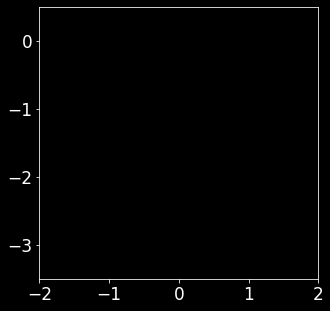

In [ ]:

fig = plt.figure(figsize  = (5,5))
ax  = fig.add_subplot(1,1,1)
ax.set_xlim([-2,2])
ax.set_ylim([-3.5, 0.5])

plt.rcParams['font.size'] = 17

lis = []
for i in range(len(y)):
  ln, = ax.plot([0, l1*np.sin(y[i,0]), l1*np.sin(y[i,0]) + l2*np.sin([y[i,2]])], [0, -l1*np.cos(y[i,0]),-l1*np.cos(y[i,0]) - l2*np.cos(y[i,2])], color = 'b', lw = 2)
#  ln1, = ax.plot([0, l1*np.sin(yl[i,0]), l1*np.sin(yl[i,0]) + l2*np.sin([yl[i,2]])], [0, -l1*np.cos(yl[i,0]),-l1*np.cos(yl[i,0]) - l2*np.cos(yl[i,2])], color = 'b', lw = 2)

  bob, = ax.plot([l1*np.sin(y[i,0]), l1*np.sin(y[i,0]) + l2*np.sin([y[i,2]])], [-l1*np.cos(y[i,0]),-l1*np.cos(y[i,0]) - l2*np.cos(y[i,2])], 'o', color = 'r', markersize = 5)
#  bob1, = ax.plot([l1*np.sin(yl[i,0]), l1*np.sin(yl[i,0]) + l2*np.sin([yl[i,2]])], [-l1*np.cos(yl[i,0]),-l1*np.cos(yl[i,0]) - l2*np.cos(yl[i,2])], 'o', color = 'r', markersize = 5)
 
  lis.append([ln, bob,])

ani = animation.ArtistAnimation(fig, lis, interval = 50)
ani.save('double.mp4', writer = 'ffmpeg', fps = 20)


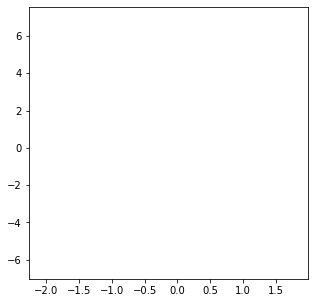

In [ ]:
#phase space plot

ptheta1 = (1/6)*m1*(l1**2)*(8*(y[:len(y) + 1, 1])**2 + 3*np.cos(y[:len(y)+1,0]-y[:len(y)+1,2])*(y[:len(y)+1,3])**2 )
li = []
fig = plt.figure(figsize  = (5,5))
ax  = fig.add_subplot(1,1,1)
for i in range(len(y)):
  k = ax.plot(y[:i+1,0], y[:i+1,1])
  li.append(k)
ani = animation.ArtistAnimation(fig, li, interval = 50)
ani.save("cool.mp4")